In [42]:
import pathlib

import pandas as pd

from bothunting import definitions

# Auxiliary functions

In [43]:
def show_head(df: pd.DataFrame):
    print(df.head())
    
def show_tail(df: pd.DataFrame):
    print(df.tail())
    
def get_header(df: pd.DataFrame):
    return list(df.columns)
    
def show_header(df: pd.DataFrame):
    print(get_header(df))
    
def print_sep():
    print(40*"-")

# Import feature data

In [44]:
prj_root = definitions.get_prj_root()
print(prj_root)

C:\Users\akasn\PycharmProjects\bothunting


In [45]:
path_features = prj_root / "bothunting" / "datasets" / "expanded_dataset"  / "complete_data.csv"
df = pd.read_csv(path_features)

In [46]:
show_head(df)
print_sep()
show_tail(df)

print(len(df))

           id               name      screen_name  statuses_count  \
0  1502026416    TASUKU HAYAKAWA         0918Bask            2177   
1  2492782375              ro_or         1120Roll            2660   
2   293212315           bearclaw        14KBBrown            1254   
3   191839658  pocahontas farida      wadespeters          202968   
4  3020965143           Ms Kathy  191a5bd05da04dc              82   

   followers_count  friends_count  favourites_count  listed_count  \
0              208            332               265             1   
1              330            485              3972             5   
2              166            177              1185             0   
3             2248            981             60304           101   
4               21             79                 5             0   

                      url lang  ...   test_set_2 is_protected  \
0                     NaN   ja  ...          0.0         True   
1                     NaN   ja  ...     

# Filter dataset

In [47]:
def filter_columns(df: pd.DataFrame):
    df = df.copy()
    header = get_header(df)
    idx = header.index("is_protected")
    new_header = ["id"] + header[idx:]
    print_sep()
    print(f"header={header}")
    print(f"new_header={new_header}")
    return df[new_header]
    
show_head(df)
df = filter_columns(df)
print_sep()
show_head(df)

           id               name      screen_name  statuses_count  \
0  1502026416    TASUKU HAYAKAWA         0918Bask            2177   
1  2492782375              ro_or         1120Roll            2660   
2   293212315           bearclaw        14KBBrown            1254   
3   191839658  pocahontas farida      wadespeters          202968   
4  3020965143           Ms Kathy  191a5bd05da04dc              82   

   followers_count  friends_count  favourites_count  listed_count  \
0              208            332               265             1   
1              330            485              3972             5   
2              166            177              1185             0   
3             2248            981             60304           101   
4               21             79                 5             0   

                      url lang  ...   test_set_2 is_protected  \
0                     NaN   ja  ...          0.0         True   
1                     NaN   ja  ...     

In [48]:
def filter_removed_accounts(df: pd.DataFrame):
    df = df.copy()
    return df[~pd.isnull(df["time_of_existence"])]

In [49]:
df = filter_removed_accounts(df)
print(len(df))

8613


In [50]:
df = df.dropna()
print(len(df))

8089


# Build machine learning models

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics

In [52]:
classifiers = {
    "MPLClassifier": MLPClassifier,
    "KNeighborsClassifier": KNeighborsClassifier,
    "SVC": SVC,
    #"GaussianProcessClassifier": GaussianProcessClassifier,
    # "RBF": RBF,
    "DecisionTreeClassifier": DecisionTreeClassifier,
    "RandomForestClassifier": RandomForestClassifier,
    "AdaBoostClassifier": AdaBoostClassifier,
    "GaussianNB": GaussianNB,
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis
}

In [53]:
X = df
X_header = get_header(X)[1:-1]
account_id, X, y = df["id"], df[X_header], df["result"]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

confusion_matrices = {}
precision = {}
recall = {}
f1_score = {}

for clf_name in classifiers:
    print(f"Training and testing classifier {clf_name}")
    clf = classifiers[clf_name]()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrices[clf_name] = metrics.confusion_matrix(y_pred, y_test)
    f1_score[clf_name] = metrics.f1_score(y_test, y_pred, average="weighted")
    precision[clf_name] = metrics.precision_score(y_test, y_pred, average="weighted")
    recall[clf_name] = metrics.recall_score(y_test, y_pred, average="weighted")

for clf_name in classifiers:
    print(f"Classifier: {clf_name}")
    print(f"Confusion matrix: {confusion_matrices[clf_name]}")
    print(f"Precision: {precision[clf_name]}")
    print(f"Recall: {recall[clf_name]}")
    print(f"F1 score: {f1_score[clf_name]}")
    print_sep()

Training and testing classifier MPLClassifier
Training and testing classifier KNeighborsClassifier
Training and testing classifier SVC
Training and testing classifier DecisionTreeClassifier
Training and testing classifier RandomForestClassifier
Training and testing classifier AdaBoostClassifier
Training and testing classifier GaussianNB
Training and testing classifier QuadraticDiscriminantAnalysis
Classifier: MPLClassifier
Confusion matrix: [[ 531   25   50]
 [  26  318    2]
 [  63    6 1002]]
Precision: 0.9145426546027866
Recall: 0.9149777558082056
F1 score: 0.9146911929826721
----------------------------------------
Classifier: KNeighborsClassifier
Confusion matrix: [[ 549   22   40]
 [  26  325    1]
 [  45    2 1013]]
Precision: 0.9325669275414742
Recall: 0.9327731092436975
F1 score: 0.9326484535175324
----------------------------------------
Classifier: SVC
Confusion matrix: [[544  32 110]
 [ 32 313   6]
 [ 44   4 938]]
Precision: 0.8925200133312472
Recall: 0.8872960949085517
F1 

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set t

In [54]:
f1_scores = []
recall_scores = []
precision_scores = []

for clf_name in classifiers:
    f1_scores.append(f1_score[clf_name])
    recall_scores.append(recall[clf_name])
    precision_scores.append(precision[clf_name])
print(f1_scores)
print(recall_scores)
print(precision_scores)

[0.9146911929826721, 0.9326484535175324, 0.8887201204236311, 0.911299076402523, 0.950494957533688, 0.8807301355059899, 0.5516539834717972, 0.14378723379583525]
[0.9149777558082056, 0.9327731092436975, 0.8872960949085517, 0.912011863568957, 0.9500741473059812, 0.8803756796836382, 0.661888284725655, 0.3064755313890262]
[0.9145426546027866, 0.9325669275414742, 0.8925200133312472, 0.9112089880123675, 0.9520390021175914, 0.8820637390230848, 0.745874790406427, 0.093927251340186]


In [55]:
import matplotlib.pyplot as plt
import numpy as np

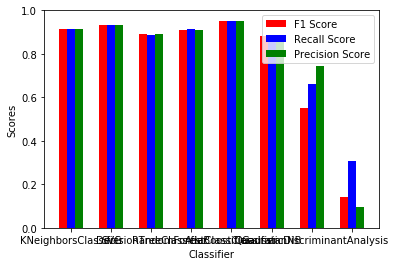

In [56]:
plot = plt.subplot(111)
plot.bar(np.arange(len(classifiers))-0.2, f1_scores, width = 0.2, color = "r", align = "center", label = "F1 Score")
plot.bar(np.arange(len(classifiers)), recall_scores, width = 0.2, color = "b", align = "center", label = "Recall Score")
plot.bar(np.arange(len(classifiers))+0.2, precision_scores, width = 0.2, color = "g", align = "center", label = "Precision Score")
plot.set_xticklabels(classifiers)
plot.set_ylabel("Scores")
plot.set_xlabel("Classifier")
plot.legend(loc = "upper right")

plt.show()

In [23]:
#TEST2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

def get_header(df: pd.DataFrame):
    return list(df.columns)

#Create KNN Object.
knn = KNeighborsClassifier()

X = df
X_header = get_header(X)[1:-1]
account_id, X, y = df["id"], df[X_header], df["result"]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=4)

#Training the model.
knn.fit(X_train, y_train)

#Predict test data set.
y_pred = log_reg.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(x,y)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

roc_auc_score(y_test, y_pred)

ValueError: could not convert string to float: 'TASUKU HAYAKAWA'

In [13]:
#TEST1

#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
import pathlib
import pandas as pd
from math import sqrt
from random import seed
from random import randrange
from bothunting import definitions

# Split a dataset into k folds
def cross_validation_split(df, n_folds):
	dataset_split = list()
	dataset_copy = list(df)
	fold_size = int(len(df) / n_folds)
	for _ in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(df, algorithm, n_folds, *args):
	folds = cross_validation_split(df, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores
 
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors
 
# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction
 
# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
	predictions = list()
	for row in test:
		output = predict_classification(train, row, num_neighbors)
		predictions.append(output)
	return(predictions)

# Test the kNN on the dataset
seed(1)
prj_root = definitions.get_prj_root()
print(prj_root)
path_features = prj_root / "bothunting" / "datasets" / "expanded_dataset"  / "complete_data.csv"
df = pd.read_csv(path_features)
for i in range(len(df[0])-1):
	str_column_to_float(dataset, i)
#convert class column to integers
str_column_to_int(df, len(df[0])-1)
#evaluate algorithm
n_folds = 5
num_neighbors = 5
scores = evaluate_algorithm(df, k_nearest_neighbors, n_folds, num_neighbors)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

C:\Users\A\bothunting


KeyError: 0